# Обробка текстів

## Що таке обробка текстів?

Обробка текстів (text mining), також відомий як текстова аналітика, - це процес витягування значущої інформації та інсайтів з неструктурованих текстових даних. Він поєднує техніки з обробки природної мови (NLP), машинного навчання та data mining для пошуку патернів, трендів та зв'язків у текстовому контенті.

### Ключові характеристики текстових даних
- **Неструктуровані**: Текст не має попередньо визначеного формату, як бази даних
- **Високовимірні**: Кожне унікальне слово може розглядатися як окремий вимір
- **Розріджені**: Більшість документів містить лише невелику підмножину всіх можливих слів
- **Шумні**: Містить друкарські помилки, абревіатури, сленг та неузгоджене форматування

### Застосування у реальному світі

1. **Інформаційний пошук**
   - Пошукові системи (Google, Bing)
   - Пошук документів та системи рекомендацій

2. **Аналіз тональності**
   - Моніторинг соціальних мереж
   - Аналіз відгуків клієнтів
   - Управління репутацією бренду

3. **Класифікація документів**
   - Виявлення спаму в електронній пошті
   - Категоризація новин
   - Сортування юридичних документів

4. **Рекомендація контенту**
   - Рекомендації фільмів Netflix
   - Пропозиції продуктів Amazon
   - Рекомендації новинних статей

5. **Бізнес-аналітика**
   - Дослідження ринку
   - Конкурентний аналіз
   - Автоматизація підтримки клієнтів

6. **Академічні дослідження**
   - Автоматизація огляду літератури
   - Кластеризація наукових статей
   - Аналіз цитувань

## Процес текстового аналізу

Типовий робочий процес текстового аналізу включає кілька ключових кроків:

1. **Збір даних**: Збір текстів з різних джерел
2. **Попередня обробка тексту**: Очищення та нормалізація текстів
3. **Кодування/інженерія ознак**: Перетворення текстів в числові представлення
4. **Пошук патернів**: Застосування алгоритмів data mining
5. **Оцінка**: Оцінка якості виявлених патернів
6. **Візуалізація**: Представлення результатів у зрозумілих форматах

## Попередня обробка текстів

Попередня обробка текстів - це критичний крок у видобутку тексту, який перетворює сирий текст у чистий, стандартизований формат, придатний для аналізу. Якість попередньої обробки безпосередньо впливає на якість подальших алгоритмів видобутку тексту.

### Чому важлива попередня обробка тексту?

Сирий текст часто містить:
- Неузгоджений регістр
- Пунктуацію та спеціальні символи
- Стоп-слова (загальні слова, такі як "the", "and", "is")
- Друкарські та орфографічні помилки
- HTML-теги, URL-адреси та адреси електронної пошти
- Числа та спеціальні символи

### Загальні техніки попередньої обробки

#### 1. Токенізація
Розбиття тексту на окремі слова або токени.

#### 2. Нормалізація
- **Приведення до нижнього регістру**: Перетворення всього тексту на нижній регістр
- **Стемінг**: Зведення слів до їх кореневої форми (наприклад, "running" → "run")
- **Лематизація**: Перетворення слів на їх словникову форму (наприклад, "better" → "good")

#### 3. Очищення
- Видалення HTML-тегів, URL-адрес та адрес електронної пошти
- Обробка спеціальних символів та чисел
- Видалення зайвих пробілів

#### 4. Видалення стоп-слів
Усунення загальних слів, які не несуть багато значення.

#### 5. Фільтрація
- Видалення слів, які з'являються занадто часто або занадто рідко

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
try:
    nltk.download('punkt')
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    nltk.download('wordnet')
except:
    print("NLTK data already downloaded or download failed")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /Users/roman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/roman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/roman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/roman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Sample text data for demonstration
sample_texts = [
    "The quick brown fox jumps over the lazy dog. This is a sample sentence for text mining.",
    "Text mining is the process of extracting meaningful information from unstructured text data.",
    "Machine learning algorithms can be applied to text data for classification and clustering.",
    "Natural language processing combines computational linguistics with machine learning.",
    "Data science involves statistics, programming, and domain expertise to extract insights.",
    "The fox is quick and the dog is lazy. Text processing requires careful preprocessing steps.",
    "Machine learning models need training data to learn patterns and make predictions.",
    "Natural language understanding is a challenging problem in artificial intelligence."
]

print("Sample text documents:")
for i, text in enumerate(sample_texts, 1):
    print(f"Document {i}: {text}")
    print()

Sample text documents:
Document 1: The quick brown fox jumps over the lazy dog. This is a sample sentence for text mining.

Document 2: Text mining is the process of extracting meaningful information from unstructured text data.

Document 3: Machine learning algorithms can be applied to text data for classification and clustering.

Document 4: Natural language processing combines computational linguistics with machine learning.

Document 5: Data science involves statistics, programming, and domain expertise to extract insights.

Document 6: The fox is quick and the dog is lazy. Text processing requires careful preprocessing steps.

Document 7: Machine learning models need training data to learn patterns and make predictions.

Document 8: Natural language understanding is a challenging problem in artificial intelligence.



In [3]:
def preprocess_text(text, remove_stopwords=True, stem=True, lemmatize=False):
    """
    Comprehensive text preprocessing function

    Parameters:
    text (str): Input text to preprocess
    remove_stopwords (bool): Whether to remove stop words
    stem (bool): Whether to apply stemming (ignored if lemmatize is True)
    lemmatize (bool): Whether to apply lemmatization instead of stemming

    Returns:
    str: Preprocessed text
    """
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags, URLs, and email addresses
    text = re.sub(r'<[^>]+>', '', text)  # HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # URLs
    text = re.sub(r'\S+@\S+', '', text)  # Email addresses

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

    # Apply lemmatization or stemming
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    elif stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

# Demonstrate preprocessing
print("Original text:")
print(sample_texts[0])

print("\nPreprocessed text (default: stopwords removed + stemming):")
print(preprocess_text(sample_texts[0]))

print("\nPreprocessed text (without stop word removal):")
print(preprocess_text(sample_texts[0], remove_stopwords=False))

print("\nPreprocessed text (with lemmatization instead of stemming):")
print(preprocess_text(sample_texts[0], stem=False, lemmatize=True))


Original text:
The quick brown fox jumps over the lazy dog. This is a sample sentence for text mining.

Preprocessed text (default: stopwords removed + stemming):
quick brown fox jump lazi dog sampl sentenc text mine

Preprocessed text (without stop word removal):
the quick brown fox jump over the lazi dog thi is a sampl sentenc for text mine

Preprocessed text (with lemmatization instead of stemming):
quick brown fox jump lazy dog sample sentence text mining


In [4]:
# Preprocess all sample texts
preprocessed_texts = [preprocess_text(text) for text in sample_texts]

print("Preprocessed documents:")
for i, text in enumerate(preprocessed_texts, 1):
    print(f"Document {i}: {text}")
    print()

# Analyze vocabulary
all_words = []
for text in preprocessed_texts:
    all_words.extend(text.split())

word_freq = Counter(all_words)
print(f"Total unique words: {len(word_freq)}")
print(f"Most common words: {word_freq.most_common(10)}")

Preprocessed documents:
Document 1: quick brown fox jump lazi dog sampl sentenc text mine

Document 2: text mine process extract meaning inform unstructur text data

Document 3: machin learn algorithm appli text data classif cluster

Document 4: natur languag process combin comput linguist machin learn

Document 5: data scienc involv statist program domain expertis extract insight

Document 6: fox quick dog lazi text process requir care preprocess step

Document 7: machin learn model need train data learn pattern make predict

Document 8: natur languag understand challeng problem artifici intellig

Total unique words: 49
Most common words: [('text', 5), ('data', 4), ('learn', 4), ('process', 3), ('machin', 3), ('quick', 2), ('fox', 2), ('lazi', 2), ('dog', 2), ('mine', 2)]


## Модель "Мішок слів"

Модель **"Мішок слів" (Bag of Words, BoW)** - одна з найпростіших та найбільш широко використовуваних технік представлення тексту. Вона розглядає кожен документ як "мішок" слів, ігноруючи порядок та структуру слів, але відстежуючи їх частоту.

### Проблема, яку вирішує BoW

Перед тим, як ми можемо застосувати алгоритми машинного навчання до текстових даних, нам потрібно перетворити неструктурований текст у числові представлення. Фундаментальний виклик полягає в тому, що:

1. **Текст неструктурований**: Сирий текст містить слова, пунктуацію та форматування, які алгоритми не можуть безпосередньо обробляти
2. **Змінна довжина**: Документи різні за довжиною
3. **Висока розмірність**: Кожне унікальне слово може бути ознакою, що призводить до дуже високовимірних просторів
4. **Розрідженість**: Більшість документів містить лише невелику підмножину всіх можливих слів

**BoW вирішує ці виклики:**
- Перетворюючи текст у вектори фіксованої довжини
- Використовуючи інформацію про частоту слів, яка часто вказує на вміст документа

### Коли використовувати "Мішок слів"

- Документи досить довгі (більше слів = краща статистика)
- Частота слів є значущою (наприклад, "машинне навчання" часто з'являється в статтях про ML)
- Потрібна проста, швидка, інтерпретована модель
- Обчислювальні ресурси обмежені

### Як працює "Мішок слів"

1. **Створення словника**: Зібрати всі унікальні слова з усіх документів
2. **Векторизація**: Перетворити кожен документ у числовий вектор
3. **Підрахунок частоти**: Підрахувати, скільки разів кожне слово з'являється в кожному документі

Для документа $d$ та словника $V$, представлення "мішок слів" є:

$$\text{BoW}(d) = [f_1, f_2, f_3, \ldots, f_{|V|}]$$

Де $f_i$ - частота слова $i$ в документі $d$.

### Приклад

Розглянемо два документи:
- Документ 1: "The cat sat on the mat"
- Документ 2: "The dog sat on the log"

**Крок 1: Створити словник**
Словник: {the, cat, sat, on, mat, dog, log}

**Крок 2: Підрахувати частоти слів**
- Документ 1: "the"=2, "cat"=1, "sat"=1, "on"=1, "mat"=1, "dog"=0, "log"=0
- Документ 2: "the"=2, "cat"=0, "sat"=1, "on"=1, "mat"=0, "dog"=1, "log"=1

**Крок 3: Створити вектори**
- Документ 1: [2, 1, 1, 1, 1, 0, 0]
- Документ 2: [2, 0, 1, 1, 0, 1, 1]

### Практичні міркування реалізації

**Управління розміром словника:**
- **Занадто малий**: Може пропустити важливі слова
- **Занадто великий**: Збільшує обчислювальну вартість та розрідженість
- **Загальний підхід**: Видалити дуже рідкісні слова (з'являються в < 2 документах) та дуже загальні слова (стоп-слова)

**Обробка різних довжин документів:**
- **Сирий підрахунок**: Довші документи мають вищі значення
- **Нормалізація**: Розділити на довжину документа для справедливого порівняння
- **Двійкове кодування**: Просто вказати наявність/відсутність слів

**Пам'ять та продуктивність:**
- Використовувати розріджені матриці для великих словників
- Розглянути техніки зменшення розмірності
- Реалізувати ефективні алгоритми підрахунку

### Переваги та обмеження

**Переваги:**
- Простий для розуміння та реалізації
- Добре працює для багатьох завдань класифікації тексту
- Обчислювально ефективний
- Інтерпретовані результати (ви можете бачити, які слова важливі)
- Працює з будь-яким алгоритмом машинного навчання

**Обмеження:**
- Ігнорує порядок слів та контекст ("not good" vs "good not")
- Високовимірні розріджені вектори
- Не захоплює семантичні зв'язки між словами
- Чутливий до розміру словника
- Погана продуктивність на коротких документах
- Немає розуміння синонімів або пов'язаних термінів

In [5]:
# Implement Bag of Words model
def create_bag_of_words(documents):
    """
    Create a bag of words representation from a list of documents
    
    Parameters:
    documents (list): List of preprocessed text documents
    
    Returns:
    tuple: (vocabulary, document_vectors)
    """
    # Create vocabulary
    all_words = []
    for doc in documents:
        all_words.extend(doc.split())
    
    vocabulary = sorted(list(set(all_words)))
    vocab_to_index = {word: idx for idx, word in enumerate(vocabulary)}
    
    # Create document vectors
    document_vectors = []
    for doc in documents:
        words = doc.split()
        vector = [0] * len(vocabulary)
        for word in words:
            if word in vocab_to_index:
                vector[vocab_to_index[word]] += 1
        document_vectors.append(vector)
    
    return vocabulary, document_vectors

# Create bag of words representation
vocabulary, bow_vectors = create_bag_of_words(preprocessed_texts)

print(f"Vocabulary size: {len(vocabulary)}")
print(f"Vocabulary: {vocabulary[:20]}...")  # Show first 20 words
print(f"Number of documents: {len(bow_vectors)}")
print(f"Vector dimensions: {len(bow_vectors[0])}")

# Display bag of words matrix
print("\nBag of Words Matrix (first 5 documents, first 10 features):")
bow_df = pd.DataFrame(bow_vectors, columns=vocabulary)
print(bow_df.iloc[:5, :10])

Vocabulary size: 49
Vocabulary: ['algorithm', 'appli', 'artifici', 'brown', 'care', 'challeng', 'classif', 'cluster', 'combin', 'comput', 'data', 'dog', 'domain', 'expertis', 'extract', 'fox', 'inform', 'insight', 'intellig', 'involv']...
Number of documents: 8
Vector dimensions: 49

Bag of Words Matrix (first 5 documents, first 10 features):
   algorithm  appli  artifici  brown  care  challeng  classif  cluster  \
0          0      0         0      1     0         0        0        0   
1          0      0         0      0     0         0        0        0   
2          1      1         0      0     0         0        1        1   
3          0      0         0      0     0         0        0        0   
4          0      0         0      0     0         0        0        0   

   combin  comput  
0       0       0  
1       0       0  
2       0       0  
3       1       1  
4       0       0  


In [6]:
# Document similarity analysis using BoW vectors
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all document pairs
similarity_matrix = cosine_similarity(bow_vectors)

print("=== Document Similarity Analysis ===")
print(f"Similarity matrix shape: {similarity_matrix.shape}")
print("\nCosine similarity between documents:")
print("(Values closer to 1 indicate more similar documents)")

# Display similarity matrix with document labels
doc_labels = [f"Doc {i+1}" for i in range(len(sample_texts))]
similarity_df = pd.DataFrame(similarity_matrix, 
                           index=doc_labels, 
                           columns=doc_labels)

print("\nSimilarity Matrix:")
print(similarity_df.round(3))

# Find most similar document pairs
print("\n=== Most Similar Document Pairs ===")
# Get upper triangle indices (avoid duplicates and self-similarity)
upper_tri_indices = np.triu_indices_from(similarity_matrix, k=1)
similarities = similarity_matrix[upper_tri_indices]
pairs = list(zip(upper_tri_indices[0], upper_tri_indices[1], similarities))

# Sort by similarity (descending)
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

for i, (doc1_idx, doc2_idx, sim_score) in enumerate(pairs_sorted[:3]):
    print(f"{i+1}. Documents {doc1_idx+1} & {doc2_idx+1}: {sim_score:.3f}")
    print(f"   Doc {doc1_idx+1}: {sample_texts[doc1_idx][:60]}...")
    print(f"   Doc {doc2_idx+1}: {sample_texts[doc2_idx][:60]}...")
    print()

# Analyze sparsity
total_elements = len(bow_vectors) * len(vocabulary)
non_zero_elements = np.count_nonzero(bow_vectors)
sparsity = 1 - (non_zero_elements / total_elements)

print(f"\nSparsity of the BoW matrix: {sparsity:.2%}")
print(f"Non-zero elements: {non_zero_elements} out of {total_elements}")
print(f"Average similarity between documents: {np.mean(similarities):.3f}")

=== Document Similarity Analysis ===
Similarity matrix shape: (8, 8)

Cosine similarity between documents:
(Values closer to 1 indicate more similar documents)

Similarity Matrix:
       Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8
Doc 1  1.000  0.286  0.112  0.000  0.000  0.500  0.000  0.000
Doc 2  0.286  1.000  0.320  0.107  0.201  0.286  0.087  0.000
Doc 3  0.112  0.320  1.000  0.250  0.118  0.112  0.408  0.000
Doc 4  0.000  0.107  0.250  1.000  0.000  0.112  0.306  0.267
Doc 5  0.000  0.201  0.118  0.000  1.000  0.000  0.096  0.000
Doc 6  0.500  0.286  0.112  0.112  0.000  1.000  0.000  0.000
Doc 7  0.000  0.087  0.408  0.306  0.096  0.000  1.000  0.000
Doc 8  0.000  0.000  0.000  0.267  0.000  0.000  0.000  1.000

=== Most Similar Document Pairs ===
1. Documents 1 & 6: 0.500
   Doc 1: The quick brown fox jumps over the lazy dog. This is a sampl...
   Doc 6: The fox is quick and the dog is lazy. Text processing requir...

2. Documents 3 & 7: 0.408
   Doc 3: Machine learni

## TF-IDF (Частота терміна - Обернена частота документа, Term frequency - inverse document frequency)

**TF-IDF** - це покращення "мішка слів", яке вирішує проблему домінування частих слів.

### Розуміння TF-IDF

TF-IDF поєднує дві метрики:

1. **Частота терміна (TF)**: Наскільки часто термін з'являється в документі
2. **Обернена частота документа (IDF)**: Наскільки рідкісний або загальний термін серед усіх документів

### Математична формулювання

**Частота терміна (TF):**
$$\text{TF}(t,d) = \frac{\text{кількість терміна } t \text{ в документі } d}{\text{загальна кількість термінів у документі } d}$$

**Обернена частота документа (IDF):**
$$\text{IDF}(t,D) = \log\left(\frac{\text{загальна кількість документів}}{\text{кількість документів, що містять термін } t}\right)$$

**TF-IDF:**
$$\text{TF-IDF}(t,d,D) = \text{TF}(t,d) \times \text{IDF}(t,D)$$

### Чому працює TF-IDF

- **Високий TF-IDF**: Терміни, які часто з'являються в конкретному документі, але рідко в корпусі
- **Низький TF-IDF**: Терміни, які часто з'являються в багатьох документах (як стоп-слова)
- **Нульовий TF-IDF**: Терміни, які не з'являються в документі

### Переваги TF-IDF

1. **Зменшує шум**: Загальні слова отримують нижчі ваги
2. **Підкреслює важливі терміни**: Рідкісні, але релевантні терміни отримують вищі ваги
3. **Краща схожість документів**: Більш значущі міри схожості
4. **Широко використовується**: Стандарт у інформаційному пошуку та видобутку тексту

### Обмеження

1. **Все ще ігнорує порядок слів**: Як і "мішок слів"
2. **Залежний від словника**: Продуктивність залежить від якості словника
3. **Немає семантичного розуміння**: Не захоплює значення слів

In [7]:
# Compare BoW vs TF-IDF using scikit-learn
print("=== Using scikit-learn for comparison ===")

# Bag of Words with scikit-learn
bow_vectorizer = CountVectorizer()
bow_matrix_sklearn = bow_vectorizer.fit_transform(preprocessed_texts)

# TF-IDF with scikit-learn
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_sklearn = tfidf_vectorizer.fit_transform(preprocessed_texts)

print(f"Scikit-learn BoW shape: {bow_matrix_sklearn.shape}")
print(f"Scikit-learn TF-IDF shape: {tfidf_matrix_sklearn.shape}")

# Compare top terms by TF-IDF score
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix_sklearn.toarray()

# Get top terms for each document
print("\nTop 5 terms by TF-IDF score for each document:")
for i in range(len(sample_texts)):
    doc_scores = tfidf_scores[i]
    top_indices = np.argsort(doc_scores)[-5:][::-1]
    top_terms = [(feature_names[idx], doc_scores[idx]) for idx in top_indices if doc_scores[idx] > 0]
    print(f"Document {i+1}: {top_terms}")

=== Using scikit-learn for comparison ===
Scikit-learn BoW shape: (8, 49)
Scikit-learn TF-IDF shape: (8, 49)

Top 5 terms by TF-IDF score for each document:
Document 1: [('sampl', np.float64(0.3554707243369083)), ('jump', np.float64(0.3554707243369083)), ('brown', np.float64(0.3554707243369083)), ('sentenc', np.float64(0.3554707243369083)), ('quick', np.float64(0.2979122096288147))]
Document 2: [('text', np.float64(0.48145506587430986)), ('unstructur', np.float64(0.3796482155534453)), ('meaning', np.float64(0.3796482155534453)), ('inform', np.float64(0.3796482155534453)), ('mine', np.float64(0.3181748341952562))]
Document 3: [('algorithm', np.float64(0.4134444783653823)), ('classif', np.float64(0.4134444783653823)), ('appli', np.float64(0.4134444783653823)), ('cluster', np.float64(0.4134444783653823)), ('machin', np.float64(0.29899998281345574))]
Document 4: [('linguist', np.float64(0.4091435150089371)), ('combin', np.float64(0.4091435150089371)), ('comput', np.float64(0.40914351500893

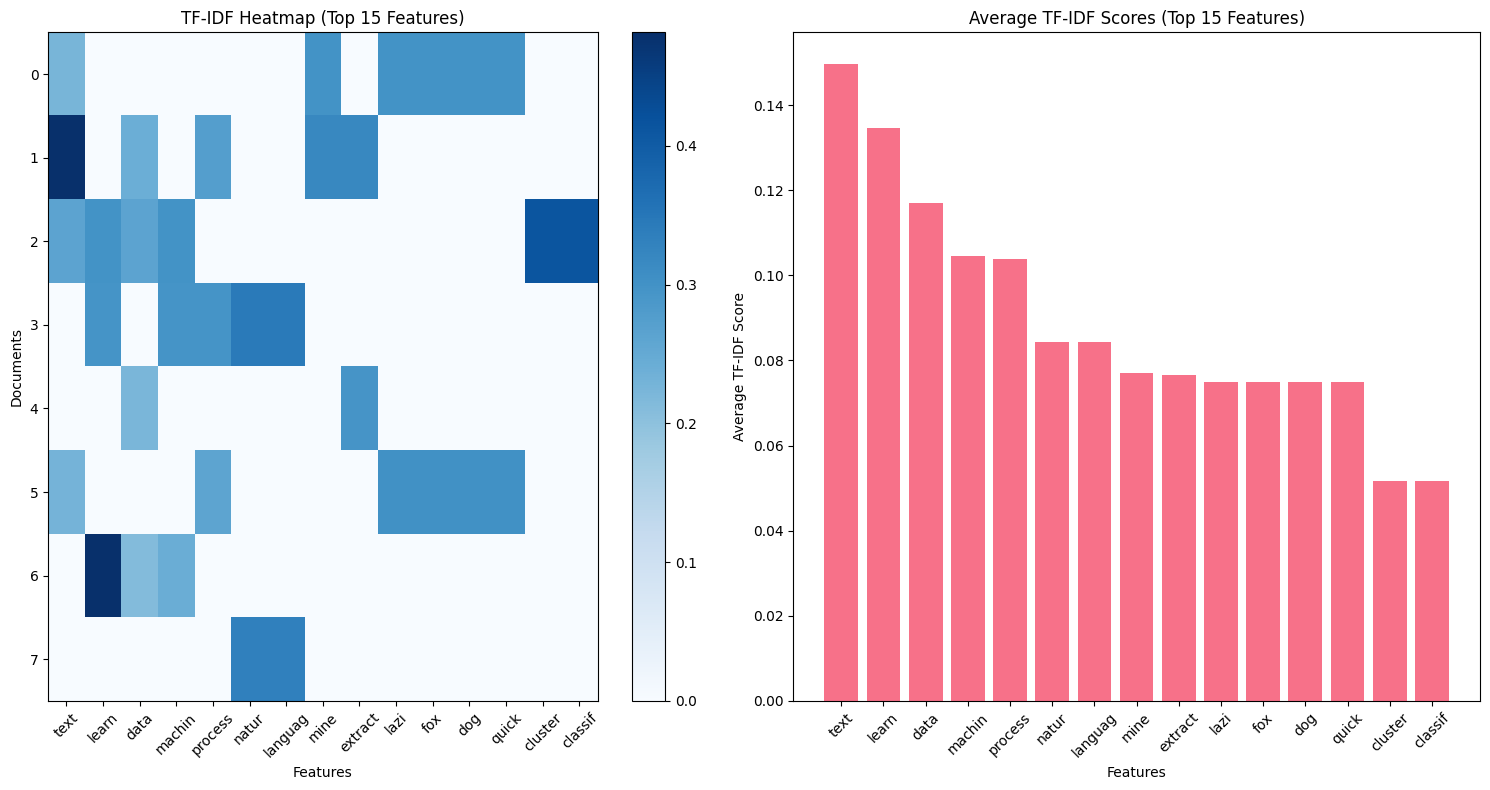

In [8]:
# Visualize TF-IDF scores
plt.figure(figsize=(15, 8))

# Create heatmap of TF-IDF scores
tfidf_dense = tfidf_matrix_sklearn.toarray()
top_features = np.argsort(np.sum(tfidf_dense, axis=0))[-15:][::-1]

plt.subplot(1, 2, 1)
plt.imshow(tfidf_dense[:, top_features], cmap='Blues', aspect='auto')
plt.colorbar()
plt.title('TF-IDF Heatmap (Top 15 Features)')
plt.xlabel('Features')
plt.ylabel('Documents')
plt.xticks(range(len(top_features)), [feature_names[i] for i in top_features], rotation=45)

# Plot average TF-IDF scores
plt.subplot(1, 2, 2)
avg_tfidf = np.mean(tfidf_dense, axis=0)
top_avg_indices = np.argsort(avg_tfidf)[-15:][::-1]
plt.bar(range(len(top_avg_indices)), avg_tfidf[top_avg_indices])
plt.xticks(range(len(top_avg_indices)), [feature_names[i] for i in top_avg_indices], rotation=45)
plt.title('Average TF-IDF Scores (Top 15 Features)')
plt.xlabel('Features')
plt.ylabel('Average TF-IDF Score')

plt.tight_layout()
plt.show()

## Кластеризація документів

Кластеризація документів - це процес групування подібних документів разом на основі їх вмісту. Це завдання навчання без вчителя, яке допомагає організувати великі колекції текстових документів та відкривати приховані патерни в даних.

### Навіщо кластеризувати документи?

1. **Організація**: Автоматично категоризувати документи без попередньо визначених міток
2. **Пошук**: Знаходити приховані теми в колекціях документів
3. **Ефективність**: Зменшити час, необхідний для знаходження релевантних документів
4. **Інсайти**: Розуміти структуру та вміст великих текстових корпусів

### Алгоритми кластеризації для тексту

#### 1. Кластеризація K-Means
- **Переваги**: Простий, швидкий, добре працює з високовимірними даними
- **Обмеження**: Потрібно визначити кількість кластерів, чутливий до ініціалізації
- **Найкраще для**: Коли ви маєте уявлення про кількість кластерів

#### 2. Ієрархічна кластеризація
- **Переваги**: Немає потреби визначати кількість кластерів, створює дендрограми
- **Обмеження**: Обчислювально дорога для великих наборів даних
- **Найкраще для**: Малі та середні набори даних, коли ви хочете дослідити ієрархію кластерів

#### 3. DBSCAN (на основі щільності)
- **Переваги**: Знаходить кластери довільних форм, обробляє шум
- **Обмеження**: Чутливий до параметрів, може мати проблеми з високовимірними даними
- **Найкраще для**: Коли кластери мають різні щільності

### Міри відстані для тексту

Оскільки текстові дані зазвичай високовимірні та розріджені, нам потрібні відповідні міри відстані:

1. **Косинусна схожість**: Вимірює кут між векторами (найпоширеніша для тексту)
2. **Евклідова відстань**: Прямолінійна відстань між точками
3. **Манхеттенська відстань**: Сума абсолютних різниць

In [9]:
# Document clustering implementation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cluster_documents(tfidf_matrix, n_clusters=3, method='kmeans'):
    """
    Cluster documents using different algorithms
    
    Parameters:
    tfidf_matrix: TF-IDF matrix of documents
    n_clusters: Number of clusters
    method: Clustering method ('kmeans', 'hierarchical')
    
    Returns:
    tuple: (cluster_labels, model)
    """
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    elif method == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError("Method must be 'kmeans' or 'hierarchical'")
    
    cluster_labels = model.fit_predict(tfidf_matrix.toarray())
    return cluster_labels, model

# Perform clustering with different numbers of clusters
n_clusters_range = range(2, 6)
silhouette_scores = []

print("Evaluating different numbers of clusters:")
for n_clusters in n_clusters_range:
    labels, _ = cluster_documents(tfidf_matrix_sklearn, n_clusters, 'kmeans')
    score = silhouette_score(tfidf_matrix_sklearn.toarray(), labels)
    silhouette_scores.append(score)
    print(f"n_clusters = {n_clusters}: Silhouette Score = {score:.3f}")

# Choose best number of clusters
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters: {best_n_clusters}")

# Perform final clustering
final_labels, kmeans_model = cluster_documents(tfidf_matrix_sklearn, best_n_clusters, 'kmeans')

Evaluating different numbers of clusters:
n_clusters = 2: Silhouette Score = 0.063
n_clusters = 3: Silhouette Score = 0.074
n_clusters = 4: Silhouette Score = 0.091
n_clusters = 5: Silhouette Score = 0.072

Best number of clusters: 4


In [10]:
# Analyze clustering results
print("=== Document Clustering Results ===")
print(f"Number of clusters: {best_n_clusters}")
print(f"Silhouette score: {max(silhouette_scores):.3f}")

# Display documents in each cluster
for cluster_id in range(best_n_clusters):
    cluster_docs = [i for i, label in enumerate(final_labels) if label == cluster_id]
    print(f"\nCluster {cluster_id} ({len(cluster_docs)} documents):")
    for doc_idx in cluster_docs:
        print(f"  Document {doc_idx + 1}: {sample_texts[doc_idx][:80]}...")

# Find most important terms for each cluster
print("\n=== Top Terms per Cluster ===")
for cluster_id in range(best_n_clusters):
    cluster_docs = [i for i, label in enumerate(final_labels) if label == cluster_id]
    if cluster_docs:
        # Get TF-IDF scores for documents in this cluster
        cluster_tfidf = tfidf_matrix_sklearn[cluster_docs]
        # Calculate average TF-IDF scores for this cluster
        avg_scores = np.mean(cluster_tfidf.toarray(), axis=0)
        # Get top 5 terms
        top_indices = np.argsort(avg_scores)[-5:][::-1]
        top_terms = [(feature_names[idx], avg_scores[idx]) for idx in top_indices if avg_scores[idx] > 0]
        print(f"Cluster {cluster_id}: {top_terms}")

=== Document Clustering Results ===
Number of clusters: 4
Silhouette score: 0.091

Cluster 0 (2 documents):
  Document 3: Machine learning algorithms can be applied to text data for classification and c...
  Document 7: Machine learning models need training data to learn patterns and make prediction...

Cluster 1 (2 documents):
  Document 1: The quick brown fox jumps over the lazy dog. This is a sample sentence for text ...
  Document 6: The fox is quick and the dog is lazy. Text processing requires careful preproces...

Cluster 2 (2 documents):
  Document 2: Text mining is the process of extracting meaningful information from unstructure...
  Document 5: Data science involves statistics, programming, and domain expertise to extract i...

Cluster 3 (2 documents):
  Document 4: Natural language processing combines computational linguistics with machine lear...
  Document 8: Natural language understanding is a challenging problem in artificial intelligen...

=== Top Terms per Cluster ===

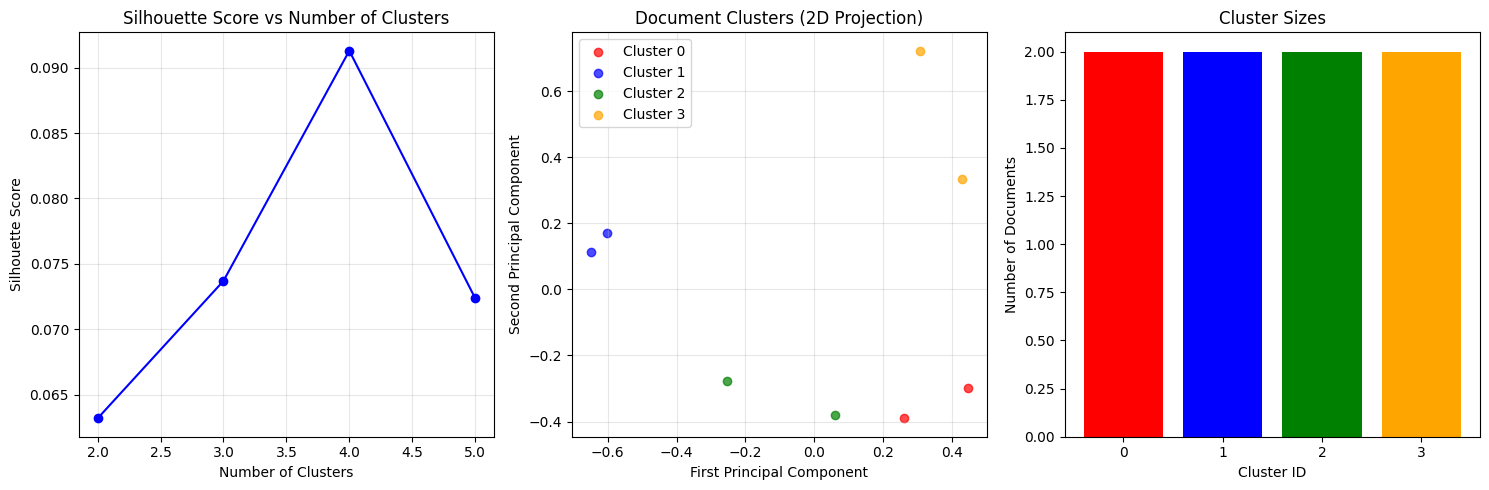

PCA explained variance ratio: [0.21873058 0.17841407]
Total explained variance: 0.397


In [11]:
# Visualize clustering results
plt.figure(figsize=(15, 5))

# Plot silhouette scores
plt.subplot(1, 3, 1)
plt.plot(n_clusters_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True, alpha=0.3)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix_sklearn.toarray())

# Plot clusters in 2D
plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster_id in range(best_n_clusters):
    cluster_mask = final_labels == cluster_id
    plt.scatter(tfidf_2d[cluster_mask, 0], tfidf_2d[cluster_mask, 1], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Document Clusters (2D Projection)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot cluster sizes
plt.subplot(1, 3, 3)
cluster_sizes = [np.sum(final_labels == i) for i in range(best_n_clusters)]
plt.bar(range(best_n_clusters), cluster_sizes, color=colors[:best_n_clusters])
plt.xlabel('Cluster ID')
plt.ylabel('Number of Documents')
plt.title('Cluster Sizes')
plt.xticks(range(best_n_clusters))

plt.tight_layout()
plt.show()

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.3f}")